<a href="https://colab.research.google.com/github/IntellectualCoders/Minor-project/blob/master/Minor_G_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jaypee Institute of Information Technology 

## Minor Project Group Number- 23

## Team Members-:<br />
Teghdeep Kapoor  18104050 <br />
Vardhika Jain 18104051<br />
Tanya Pandhi  18104064



---



## COURSE RECOMMENDATION SYSTEM TO IMPROVE LEARNING RATE OF STUDENTS IN THE COVID SCENARIO

In higher education, Courses ought to provide a deeper insight of the trending advancements in the field of specialization for undergraduate students. Making choice of elective courses during the pre-final or final year of the undergraduates play a crucial role as it helps in shaping their career or area of specialization for the better learning. However, as per the current educational scenarios, the undergraduates remain mostly confused on what to choose as they either lack in having the sufficient initial knowledge of the elective subjects or are having knowledge overflow of all subjects and so are unable to decide which one to choose. In such scenarios, they often seek the advice of their instructors or friends and mostly go with the cohort choice. However, going with the flow often creates a gap between their actual skills set and the required skills set for the elective subject that they have preferred as their choice. In later stages, this results in loss of interest of the students in the enrolled elective subject and hence a degraded academic performance is encountered by the institution. Similarly, as a result of this, there can be numerous limitations, gaps or concerns arising either in case of students or institutions in real world educational scenarios. A personalized recommender system recommends efficient course subjects to the students that indirectly predicts the academic success of different courses beforehand and along with this also preserves the student subject interests.

### Importing Pandas and Numpy for Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

### Reading Data

In [ ]:
url='https://raw.githubusercontent.com/IntellectualCoders/Minor-project/master/FinalData.csv'
df=pd.read_csv(url)

In [ ]:
df

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,SVV,SVV,91.0,88.6
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,CC,CC,60.0,87.1
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,CS,CS,90.0,86.9
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,IOT,IOT,58.0,67.4
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,ML,ML,60.0,88.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing NaN values from Data

In [ ]:
print(df.shape)
df.dropna(inplace=True,how='any')
print(df.shape)

(3017, 15)
(2944, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2943
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_ID                 2944 non-null   object 
 1   CP                         2944 non-null   float64
 2   DSA                        2944 non-null   float64
 3   DBMS                       2944 non-null   float64
 4   MP                         2944 non-null   float64
 5   COA                        2944 non-null   float64
 6   SE                         2944 non-null   float64
 7   CNS                        2944 non-null   float64
 8   OS                         2944 non-null   float64
 9   WEBDEV                     2944 non-null   float64
 10  AUTOMATA                   2944 non-null   float64
 11  Preference Of Elective     2944 non-null   object 
 12  Alloted Elective           2944 non-null   object 
 13  Marks In Alloted Elective  2944 non-null   float

In [ ]:
df['Preference Of Elective'].unique()

array(['SVV', 'CC', 'CS', 'IOT', 'ML', 'NLP', 'AR_VR'], dtype=object)

In [ ]:
df.groupby(['Preference Of Elective']).mean()

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Marks In Alloted Elective,CGPA
Preference Of Elective,,,,,,,,,,,,
AR_VR,70.128146,70.086957,68.894737,71.155606,69.791762,68.487414,67.078261,70.302059,70.485126,68.913043,68.389016,69.532311
CC,70.984848,70.259259,69.787879,70.195286,70.577441,69.952862,69.955387,69.161616,69.016835,68.279461,68.727273,69.817088
CS,69.095855,69.514249,69.766839,70.365285,68.117876,69.722798,68.331347,69.389896,69.871762,69.277202,69.194301,69.345311
IOT,69.200658,69.434211,70.447368,71.078947,69.552632,68.335526,70.159868,68.625000,69.276316,68.016447,68.944079,69.412697
ML,69.347140,70.222880,70.554241,69.398422,69.635108,69.520710,69.056914,69.984221,68.285996,68.930966,69.550296,69.493660
NLP,71.427673,69.610063,70.716981,69.522013,70.125786,68.811321,70.440252,67.817610,69.993711,70.276730,70.723270,69.874214
SVV,69.555556,70.128655,69.046784,68.865497,70.573099,70.064327,69.926316,68.602339,72.116959,70.953216,71.298246,69.983275


### Data manipulation converting categorical data into dummy variables

In [ ]:
pref = pd.get_dummies(df['Preference Of Elective'])
alc = pd.get_dummies(df['Alloted Elective'])

In [ ]:
pref

,AR_VR,CC,CS,IOT,ML,NLP,SVV
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2939,0,0,0,0,1,0,0
2940,0,1,0,0,0,0,0
2941,0,0,1,0,0,0,0
2942,0,0,0,0,0,1,0


In [ ]:
alc

,AR_VR,CC,CS,IOT,ML,NLP,SVV
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2939,0,0,0,0,0,0,1
2940,0,0,0,0,0,0,1
2941,0,0,0,0,0,0,1
2942,0,0,0,0,0,1,0


In [ ]:
df1 = pd.concat([df,alc],ignore_index=False,axis=1,verify_integrity=False)

In [ ]:
df1.shape

(2944, 22)

### Renaming Colums for Better Understanding

In [ ]:
df1.rename(columns={'AR_VR':'A_AR_VR','CC':'A_CC','CS':'A_CS','IOT':'A_IOT','ML':'A_ML','NLP':"A_NLP",'SVV':"A_SVV"},inplace=True)

In [ ]:
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,SVV,SVV,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,CC,CC,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,CS,CS,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,IOT,IOT,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,ML,ML,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,ML,SVV,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,CC,SVV,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,CS,SVV,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,NLP,NLP,84.0,69.4,0,0,0,0,0,1,0


In [ ]:
df2 = pd.concat([df1,pref],axis=1)

In [ ]:
df2.drop(['Preference Of Elective','Alloted Elective'],axis=1,inplace=True)

In [ ]:
df2.shape

(2944, 27)

In [ ]:
df2.columns

Index(['Student_ID', 'CP', 'DSA', 'DBMS', 'MP', 'COA', 'SE', 'CNS', 'OS',
       'WEBDEV', 'AUTOMATA', 'Marks In Alloted Elective', 'CGPA', 'A_AR_VR',
       'A_CC', 'A_CS', 'A_IOT', 'A_ML', 'A_NLP', 'A_SVV', 'AR_VR', 'CC', 'CS',
       'IOT', 'ML', 'NLP', 'SVV'],
      dtype='object')

In [ ]:
df2.rename(columns={'AR_VR':"P_AR_VR",'CC':"P_CC",'CS':"P_CS",'IOT':"P_IOT",'ML':"P_ML",'NLP':"P_NLP",'SVV':"P_SVV"},inplace=True)

In [ ]:
df2


,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,91.0,88.6,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,60.0,87.1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,90.0,86.9,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,58.0,67.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,60.0,88.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,71.0,52.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,45.0,50.6,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,92.0,50.1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,84.0,69.4,0,0,0,0,0,1,0,0,0,0,0,0,1,0




---



## Data Visualization

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
cols= list(df2.columns.values)

In [ ]:
df1['Alloted Elective'] = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
df1['Preference Of Elective'] = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,1,1,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,2,2,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,3,3,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,4,4,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,5,5,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,5,1,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,2,1,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,3,1,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,6,6,84.0,69.4,0,0,0,0,0,1,0


In [ ]:
df_visual = df1[cols[1:11]]
df_visual

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0
...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0


In [ ]:
principalComponents = pca.fit_transform(df_visual)

In [ ]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2 '])
allotelect = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
prefelect = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df12= pd.DataFrame(data= prefelect, columns=['hue2'])
df11= pd.DataFrame(data = allotelect, columns=['hue'])
df11

,hue
0,1
1,2
2,3
3,4
4,5
...,...
2939,1
2940,1
2941,1
2942,6


In [ ]:
principal_Df = pd.concat([principal_Df,df11,df12],axis=1)

In [ ]:
principal_Df.tail()

,principal component 1,principal component 2,hue,hue2
2939,0.700420,-9.213964,1,5
2940,-12.073518,17.491054,1,2
2941,12.296817,-3.408235,1,3
2942,-10.181429,21.679597,6,6
2943,29.312413,-4.894352,6,6


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11189313 0.10624528]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

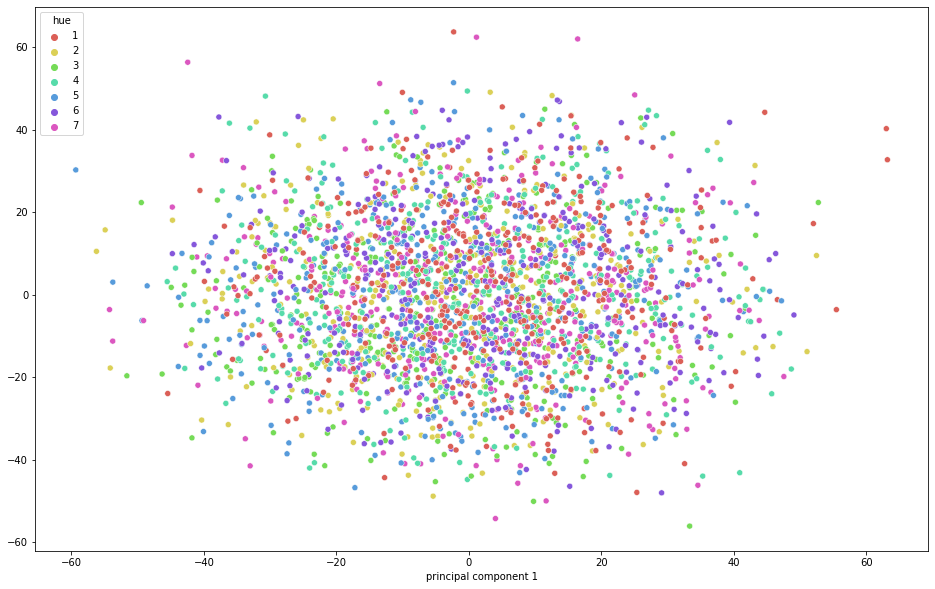

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1',
    y=principalComponents[:,1],
    palette=sns.color_palette("hls", 7),
    hue = 'hue',
    data = principal_Df,
    legend="full"
)

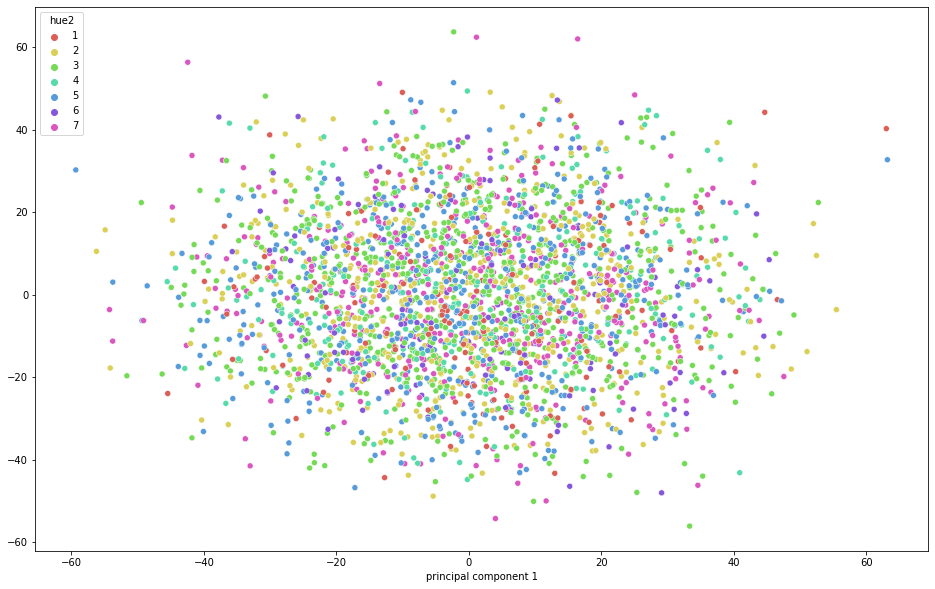

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1',
    y=principalComponents[:,1],
    palette=sns.color_palette("hls", 7),
    hue = 'hue2',
    data = principal_Df,
    legend="full"
)



---
<br />

## Rank 1 Calculation



### User to User Collaborative Filtering 


In [ ]:
test =[54.0,	55.0,	19.0,	14.0,	47.0,	48.0,	15.0,	55.0,	45.0,	43.0]

In [ ]:
cols= list(df2.columns.values)

In [ ]:
df3 = df2[cols[1:11]]
df3


,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0
...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0


### Calculating Cosine Similarity of Active Student with past students data

In [ ]:
from scipy import spatial

In [ ]:
df4 = pd.DataFrame(columns = ['Cosine Similarity']) 
for ind,rows in df3.iterrows():
  a = spatial.distance.cosine(test,rows)
  df4 = df4.append({'Cosine Similarity':a}, ignore_index = True) 
df4 

,Cosine Similarity
0,0.104051
1,0.055492
2,0.094700
3,0.075419
4,0.107468
...,...
2939,0.106617
2940,0.149634
2941,0.099087
2942,0.130179


In [ ]:
df5 = pd.concat([df1,df4],ignore_index=False,axis=1,verify_integrity=False)
df5=df5.sort_values(by=['Cosine Similarity'])
df5

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV,Cosine Similarity
159,SID20159475,81.0,95.0,44.0,51.0,90.0,96.0,60.0,91.0,94.0,80.0,2,2,78.0,78.2,0,1,0,0,0,0,0,0.019109
997,SID20131754,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,83.0,7,7,85.0,70.7,1,0,0,0,0,0,0,0.023443
2403,SID20179019,86.0,94.0,49.0,59.0,72.0,93.0,46.0,94.0,61.0,59.0,4,4,78.0,71.3,0,0,0,1,0,0,0,0.024323
224,SID20187237,96.0,100.0,56.0,62.0,87.0,88.0,58.0,95.0,67.0,69.0,3,3,49.0,77.8,0,0,1,0,0,0,0,0.024664
1673,SID20143300,73.0,73.0,53.0,40.0,78.0,72.0,46.0,88.0,64.0,96.0,3,4,63.0,68.3,0,0,0,1,0,0,0,0.026014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,SID20139023,69.0,47.0,100.0,62.0,45.0,22.0,72.0,28.0,86.0,42.0,5,1,55.0,57.3,0,0,0,0,0,0,1,0.221937
2399,SID20174162,26.0,40.0,66.0,100.0,42.0,77.0,90.0,44.0,75.0,79.0,2,6,68.0,63.9,0,0,0,0,0,1,0,0.223938
2632,SID20135449,48.0,84.0,98.0,93.0,27.0,71.0,71.0,24.0,43.0,62.0,3,1,42.0,62.1,0,0,0,0,0,0,1,0.225871
2734,SID20143347,52.0,61.0,93.0,89.0,68.0,45.0,91.0,50.0,42.0,23.0,5,1,40.0,61.4,0,0,0,0,0,0,1,0.226609


### Selecting top 5 percent data similar to student

In [ ]:
df6 = pd.DataFrame(columns = ['Cosine Similarity']) 
for ind,rows in df5.iterrows():
  if rows['Cosine Similarity'] <= 0.05:
   df6 = df6.append({'Student_ID': rows['Student_ID'],'Alloted Elective': rows['Alloted Elective'] ,'Marks In Alloted Elective': rows['Marks In Alloted Elective'],'Cosine Similarity':rows['Cosine Similarity']}, ignore_index = True) 
df6

,Cosine Similarity,Alloted Elective,Marks In Alloted Elective,Student_ID
0,0.019109,2.0,78.0,SID20159475
1,0.023443,7.0,85.0,SID20131754
2,0.024323,4.0,78.0,SID20179019
3,0.024664,3.0,49.0,SID20187237
4,0.026014,4.0,63.0,SID20143300
...,...,...,...,...
123,0.049676,6.0,69.0,SID20137601
124,0.049685,5.0,45.0,SID20169650
125,0.049759,7.0,54.0,SID20133068
126,0.049790,7.0,81.0,SID20151950


### Calculating Mean for each Elective 

In [ ]:
SVV_avg = df6.loc[df6['Alloted Elective']== 1]

CS_avg = df6.loc[df6['Alloted Elective']== 2]

CC_avg = df6.loc[df6['Alloted Elective']== 3]

AR_VR_avg = df6.loc[df6['Alloted Elective']== 4]

ML_avg = df6.loc[df6['Alloted Elective']== 5]

NLP_avg = df6.loc[df6['Alloted Elective']== 6]

IOT_avg = df6.loc[df6['Alloted Elective']== 7]

In [ ]:
rank1 = [
 AR_VR_avg['Marks In Alloted Elective'].mean(),
CC_avg['Marks In Alloted Elective'].mean(),
CS_avg['Marks In Alloted Elective'].mean(),
IOT_avg['Marks In Alloted Elective'].mean(),
ML_avg['Marks In Alloted Elective'].mean(),
NLP_avg['Marks In Alloted Elective'].mean(),
SVV_avg['Marks In Alloted Elective'].mean()]

rank1

[70.28571428571429,
 66.06666666666666,
 68.27272727272727,
 63.714285714285715,
 66.15789473684211,
 70.95,
 70.82352941176471]

### Calculating KNN Weighted Average for each elective

In [ ]:
SVV_count=0
SVV_sum=0
for i,row in SVV_avg.iterrows():
  SVV_sum = SVV_sum + (1-row['Cosine Similarity'])
  SVV_count = SVV_count + (row['Marks In Alloted Elective'] * (1-row['Cosine Similarity']))
SVV_final = SVV_count/SVV_sum
SVV_final

70.8274132970112

In [ ]:
CS_count=0
CS_sum=0
for i,row in CS_avg.iterrows():
  CS_sum = CS_sum + (1-row['Cosine Similarity'])
  CS_count = CS_count + (row['Marks In Alloted Elective'] * (1-row['Cosine Similarity']))
CS_final = CS_count/CS_sum
CS_final

68.27768739898623



---



## Rank 2 Calculation

### Categorization of Data
Estimation of Marks to nearest multiple of 5

In [ ]:
for ind,rows in df2.iterrows():   # binning the marks in allocated
    rows['Marks In Alloted Elective'] = rows['Marks In Alloted Elective']-rows['Marks In Alloted Elective']%5 
    df2.loc[ind,'Marks In Alloted Elective'] = rows['Marks In Alloted Elective']

In [ ]:
cols= list(df2.columns.values)

### Spiliting of Training and Testing Data

In [ ]:
df2


,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,90.0,88.6,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,60.0,87.1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,90.0,86.9,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,55.0,67.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,60.0,88.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,70.0,52.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,45.0,50.6,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,90.0,50.1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,80.0,69.4,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
X = df2[cols[20:27] +cols[1:11]]
Y = df2[cols[13:20]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [ ]:
Y_train

,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
1318,0,0,0,0,1,0,0
2018,0,0,0,0,1,0,0
215,0,0,1,0,0,0,0
2083,1,0,0,0,0,0,0
997,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0
835,0,1,0,0,0,0,0
1653,0,0,0,1,0,0,0
2607,0,0,0,1,0,0,0


In [ ]:
X_train

,P_AR_VR,P_CC,P_CS,P_IOT,P_ML,P_NLP,P_SVV,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA
1318,0,0,0,0,1,0,0,74.0,79.0,81.0,92.0,65.0,55.0,84.0,52.0,89.0,43.0
2018,0,0,0,0,1,0,0,55.0,87.0,55.0,47.0,62.0,81.0,79.0,60.0,68.0,78.0
215,0,0,1,0,0,0,0,76.0,67.0,47.0,86.0,77.0,84.0,63.0,93.0,97.0,90.0
2083,1,0,0,0,0,0,0,58.0,53.0,43.0,98.0,43.0,40.0,99.0,54.0,79.0,88.0
997,1,0,0,0,0,0,0,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,1,0,0,0,0,45.0,81.0,57.0,44.0,98.0,59.0,70.0,96.0,88.0,90.0
835,0,1,0,0,0,0,0,44.0,77.0,93.0,61.0,85.0,63.0,93.0,73.0,72.0,65.0
1653,0,0,1,0,0,0,0,68.0,94.0,40.0,96.0,59.0,89.0,57.0,45.0,85.0,51.0
2607,0,0,0,1,0,0,0,64.0,55.0,56.0,73.0,95.0,56.0,90.0,86.0,83.0,87.0


## Applying Educational Data Mining Techniques

### Applying Decision Tree Classifier

In [ ]:
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_SVM_train,Y_SVM_train)

In [ ]:
clf.score(X_SVM_train,Y_SVM_train)

1.0

In [ ]:
clf.get_depth()

16

### Prediciting Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = clf.predict(X_SVM_test)

In [ ]:
Y_pred

array([5, 6, 3, 4, 3, 4, 6, 1, 2, 7, 4, 6, 5, 5, 5, 3, 7, 6, 2, 5, 6, 3,
       4, 1, 7, 3, 6, 5, 4, 3, 6, 4, 7, 2, 6, 4, 5, 6, 4, 3, 3, 2, 5, 7,
       7, 7, 7, 3, 7, 2, 6, 6, 5, 6, 7, 3, 2, 3, 6, 4, 6, 1, 4, 3, 4, 5,
       3, 6, 4, 4, 6, 2, 5, 5, 3, 5, 1, 4, 1, 5, 4, 6, 4, 1, 6, 5, 5, 4,
       2, 4, 6, 1, 2, 6, 2, 4, 1, 4, 4, 5, 1, 5, 1, 3, 4, 6, 3, 4, 7, 7,
       2, 7, 4, 2, 2, 3, 4, 6, 5, 3, 5, 2, 2, 6, 4, 1, 2, 4, 3, 7, 4, 7,
       4, 6, 7, 4, 7, 7, 3, 4, 3, 2, 5, 4, 3, 4, 1, 6, 3, 6, 7, 6, 4, 3,
       4, 4, 3, 7, 2, 6, 4, 4, 7, 6, 4, 4, 2, 3, 5, 6, 1, 5, 4, 6, 1, 6,
       1, 5, 3, 2, 4, 3, 3, 7, 5, 5, 3, 7, 3, 6, 7, 5, 5, 3, 4, 3, 5, 6,
       3, 1, 3, 1, 7, 1, 5, 6, 4, 2, 6, 3, 6, 6, 5, 7, 3, 5, 4, 2, 7, 4,
       3, 3, 1, 2, 4, 3, 4, 2, 2, 2, 5, 1, 1, 6, 2, 4, 6, 4, 5, 2, 4, 6,
       6, 3, 3, 3, 5, 7, 7, 6, 2, 5, 6, 1, 2, 5, 2, 2, 2, 5, 1, 7, 6, 5,
       2, 2, 6, 3, 5, 6, 1, 1, 5, 7, 2, 7, 5, 3, 6, 1, 2, 1, 2, 4, 5, 4,
       1, 1, 6, 1, 4, 6, 3, 6, 3, 2, 3, 6, 3, 7, 5,

### Accuracy of Decision Tree

In [ ]:
from sklearn import metrics 

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_SVM_test, Y_pred))

Accuracy: 0.7555178268251274


In [ ]:
print(classification_report(Y_SVM_test,Y_pred))

              precision    recall  f1-score   support

           1       0.68      0.57      0.62        87
           2       0.88      0.81      0.84        79
           3       0.84      0.71      0.77        95
           4       0.68      0.79      0.73        81
           5       0.85      0.92      0.88        91
           6       0.46      0.55      0.50        82
           7       0.97      0.96      0.97        74

    accuracy                           0.76       589
   macro avg       0.77      0.76      0.76       589
weighted avg       0.77      0.76      0.76       589



### Displaying Decision Tree

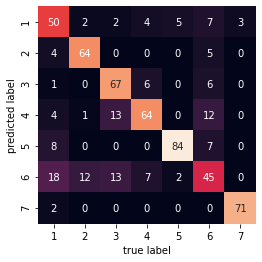

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

### Applying SVM Classifier

In [ ]:
from sklearn import svm
from sklearn import metrics 

In [ ]:
df1
cols_SVM= list(df1.columns.values)

In [ ]:
df1['Alloted Elective'] = pd.Categorical(pd.factorize(df1['Alloted Elective'])[0] + 1)
df1['Preference Of Elective'] = pd.Categorical(pd.factorize(df1['Preference Of Elective'])[0] + 1)
df1

,Student_ID,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective,Alloted Elective,Marks In Alloted Elective,CGPA,A_AR_VR,A_CC,A_CS,A_IOT,A_ML,A_NLP,A_SVV
0,SID20137026,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,1,1,91.0,88.6,0,0,0,0,0,0,1
1,SID20178543,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,2,2,60.0,87.1,0,1,0,0,0,0,0
2,SID20138999,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,3,3,90.0,86.9,0,0,1,0,0,0,0
3,SID20131184,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,4,4,58.0,67.4,0,0,0,1,0,0,0
4,SID20152052,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,5,5,60.0,88.6,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,SID20179028,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,5,1,71.0,52.0,0,0,0,0,0,0,1
2940,SID20188802,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,2,1,45.0,50.6,0,0,0,0,0,0,1
2941,SID20165566,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,3,1,92.0,50.1,0,0,0,0,0,0,1
2942,SID20189982,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,6,6,84.0,69.4,0,0,0,0,0,1,0


In [ ]:
X_SVM = df1[ cols_SVM[1:12]]
Y_SVM = df1[cols_SVM[12]]
X_SVM

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective
0,79.0,95.0,100.0,91.0,97.0,62.0,100.0,78.0,92.0,92.0,1
1,99.0,92.0,77.0,84.0,71.0,85.0,79.0,98.0,99.0,87.0,2
2,52.0,93.0,80.0,96.0,90.0,99.0,93.0,91.0,96.0,79.0,3
3,61.0,93.0,95.0,19.0,72.0,59.0,59.0,61.0,85.0,70.0,4
4,65.0,76.0,96.0,96.0,100.0,99.0,95.0,75.0,92.0,92.0,5
...,...,...,...,...,...,...,...,...,...,...,...
2939,88.0,50.0,27.0,66.0,46.0,81.0,40.0,23.0,46.0,53.0,5
2940,40.0,44.0,41.0,62.0,67.0,52.0,76.0,47.0,28.0,49.0,2
2941,47.0,52.0,41.0,43.0,70.0,41.0,57.0,28.0,54.0,68.0,3
2942,98.0,94.0,55.0,97.0,45.0,82.0,81.0,52.0,49.0,41.0,6


In [ ]:
Y_SVM

0       1
1       2
2       3
3       4
4       5
       ..
2939    1
2940    1
2941    1
2942    6
2943    6
Name: Alloted Elective, Length: 2944, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [ ]:
X_SVM_train,X_SVM_test,Y_SVM_train,Y_SVM_test = train_test_split(X_SVM,Y_SVM,test_size=0.2,random_state=0)

### Fitting SVM Model

In [ ]:
clf_SVM = svm.SVC(kernel = 'linear', C = 1)
clf_SVM.fit(X_SVM_train, Y_SVM_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_SVM_pred = clf_SVM.predict(X_SVM_test)
y_SVM_pred

array([5, 2, 3, 1, 3, 4, 1, 4, 2, 7, 6, 4, 5, 6, 5, 3, 7, 3, 1, 6, 6, 3,
       3, 2, 7, 3, 1, 6, 4, 3, 6, 1, 7, 2, 3, 4, 5, 5, 3, 3, 3, 1, 6, 7,
       7, 7, 7, 4, 7, 2, 5, 5, 5, 1, 7, 3, 2, 3, 6, 6, 5, 2, 1, 3, 4, 5,
       3, 1, 3, 4, 5, 2, 6, 5, 1, 5, 1, 4, 2, 5, 4, 1, 3, 1, 6, 1, 5, 6,
       2, 4, 5, 6, 2, 6, 2, 4, 2, 4, 4, 5, 7, 6, 4, 3, 4, 6, 3, 4, 7, 7,
       2, 7, 4, 2, 2, 1, 4, 2, 5, 3, 5, 2, 2, 5, 4, 1, 2, 3, 4, 7, 4, 7,
       4, 5, 7, 4, 7, 7, 3, 4, 3, 2, 5, 6, 3, 4, 2, 5, 1, 1, 7, 1, 1, 3,
       4, 1, 4, 7, 2, 1, 6, 4, 7, 2, 4, 4, 2, 3, 5, 5, 1, 5, 4, 5, 1, 2,
       6, 6, 4, 2, 6, 4, 3, 7, 6, 5, 1, 7, 1, 6, 7, 6, 5, 3, 4, 3, 5, 4,
       3, 2, 3, 2, 7, 1, 5, 5, 4, 2, 2, 3, 2, 1, 5, 7, 3, 6, 4, 1, 7, 4,
       1, 3, 1, 2, 4, 3, 6, 2, 2, 2, 5, 2, 1, 2, 2, 1, 4, 3, 6, 2, 1, 1,
       1, 3, 4, 3, 5, 7, 7, 2, 2, 5, 3, 2, 2, 6, 2, 2, 2, 5, 4, 7, 5, 6,
       2, 2, 1, 3, 5, 4, 1, 6, 6, 7, 2, 7, 6, 3, 1, 1, 2, 1, 2, 1, 5, 1,
       1, 4, 6, 1, 3, 1, 3, 1, 3, 2, 3, 5, 3, 7, 5,

### Visualization of SVM Model

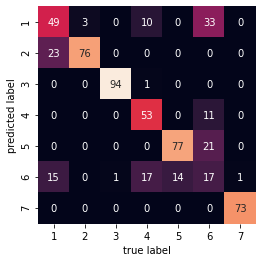

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, y_SVM_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

### Accuracy of SVM Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_SVM_test, y_SVM_pred))

Accuracy: 0.7453310696095077


In [ ]:
print(classification_report(Y_SVM_test,y_SVM_pred))


              precision    recall  f1-score   support

           1       0.52      0.56      0.54        87
           2       0.77      0.96      0.85        79
           3       0.99      0.99      0.99        95
           4       0.83      0.65      0.73        81
           5       0.79      0.85      0.81        91
           6       0.26      0.21      0.23        82
           7       1.00      0.99      0.99        74

    accuracy                           0.75       589
   macro avg       0.74      0.74      0.74       589
weighted avg       0.74      0.75      0.74       589



## KNN (k-nearest neighbours) classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
X_SVM_train

,CP,DSA,DBMS,MP,COA,SE,CNS,OS,WEBDEV,AUTOMATA,Preference Of Elective
1318,74.0,79.0,81.0,92.0,65.0,55.0,84.0,52.0,89.0,43.0,5
2018,55.0,87.0,55.0,47.0,62.0,81.0,79.0,60.0,68.0,78.0,5
215,76.0,67.0,47.0,86.0,77.0,84.0,63.0,93.0,97.0,90.0,3
2083,58.0,53.0,43.0,98.0,43.0,40.0,99.0,54.0,79.0,88.0,7
997,82.0,84.0,57.0,41.0,98.0,59.0,44.0,83.0,76.0,83.0,7
...,...,...,...,...,...,...,...,...,...,...,...
763,45.0,81.0,57.0,44.0,98.0,59.0,70.0,96.0,88.0,90.0,3
835,44.0,77.0,93.0,61.0,85.0,63.0,93.0,73.0,72.0,65.0,2
1653,68.0,94.0,40.0,96.0,59.0,89.0,57.0,45.0,85.0,51.0,3
2607,64.0,55.0,56.0,73.0,95.0,56.0,90.0,86.0,83.0,87.0,4


In [ ]:
Y_SVM_train

1318    5
2018    5
215     3
2083    7
997     7
       ..
763     3
835     2
1653    4
2607    4
2732    1
Name: Alloted Elective, Length: 2355, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

### Fitting KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_SVM_train, Y_SVM_train)

In [ ]:
knn_predictions = knn.predict(X_SVM_test)
knn_predictions

array([3, 3, 4, 3, 1, 2, 4, 4, 3, 5, 4, 5, 3, 4, 3, 7, 7, 5, 1, 2, 6, 5,
       5, 3, 7, 6, 6, 5, 5, 5, 4, 1, 1, 2, 6, 2, 3, 4, 7, 5, 7, 7, 5, 6,
       7, 1, 6, 1, 3, 3, 5, 6, 1, 7, 3, 3, 5, 4, 1, 2, 5, 3, 1, 7, 4, 3,
       4, 7, 6, 2, 5, 3, 6, 6, 5, 7, 5, 1, 5, 1, 4, 1, 5, 7, 5, 7, 5, 2,
       4, 4, 3, 1, 3, 1, 2, 6, 7, 7, 3, 6, 4, 4, 2, 6, 5, 1, 3, 2, 1, 6,
       5, 6, 4, 5, 7, 1, 7, 4, 4, 7, 6, 2, 4, 5, 3, 2, 7, 7, 3, 4, 4, 2,
       2, 1, 7, 4, 7, 1, 3, 5, 5, 5, 2, 7, 3, 7, 2, 6, 5, 1, 4, 1, 6, 5,
       7, 1, 4, 2, 3, 7, 6, 7, 2, 6, 7, 1, 2, 2, 7, 6, 4, 2, 3, 5, 4, 5,
       6, 5, 6, 7, 5, 4, 2, 3, 7, 1, 7, 4, 7, 4, 2, 4, 6, 1, 7, 3, 2, 4,
       4, 2, 3, 5, 4, 6, 7, 2, 6, 1, 3, 3, 2, 7, 5, 5, 4, 4, 4, 6, 6, 4,
       6, 2, 2, 5, 3, 2, 3, 4, 2, 5, 5, 2, 1, 4, 5, 1, 4, 6, 7, 6, 4, 6,
       6, 7, 5, 3, 7, 4, 2, 6, 2, 2, 4, 3, 7, 4, 4, 2, 3, 7, 4, 2, 3, 1,
       4, 3, 1, 4, 3, 7, 6, 6, 1, 1, 2, 2, 5, 4, 6, 2, 7, 4, 2, 1, 1, 7,
       4, 6, 1, 4, 2, 7, 7, 3, 5, 5, 4, 3, 7, 3, 7,

### Accuracy of KNN Model

In [ ]:
accuracy = knn.score(X_SVM_test, Y_SVM_test) 
accuracy 

0.21052631578947367

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_SVM_test, knn_predictions))

Accuracy: 0.21052631578947367


In [ ]:
print(classification_report(Y_SVM_test,knn_predictions))

              precision    recall  f1-score   support

           1       0.33      0.30      0.31        87
           2       0.24      0.28      0.26        79
           3       0.22      0.20      0.21        95
           4       0.22      0.22      0.22        81
           5       0.15      0.14      0.15        91
           6       0.17      0.17      0.17        82
           7       0.14      0.16      0.15        74

    accuracy                           0.21       589
   macro avg       0.21      0.21      0.21       589
weighted avg       0.21      0.21      0.21       589



### Model Visualization of KNN

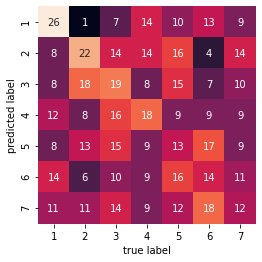

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, knn_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

## Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
gnb = GaussianNB().fit(X_SVM_train, Y_SVM_train) 
gnb_predictions = gnb.predict(X_SVM_test)
gnb_predictions

array([5, 2, 3, 3, 3, 4, 2, 3, 2, 7, 4, 3, 5, 5, 5, 3, 7, 3, 2, 5, 3, 3,
       3, 1, 7, 3, 2, 5, 4, 3, 6, 3, 7, 2, 3, 4, 5, 6, 3, 3, 3, 2, 5, 7,
       7, 7, 7, 3, 7, 2, 6, 6, 5, 3, 7, 3, 2, 3, 6, 4, 6, 1, 4, 3, 4, 5,
       3, 3, 3, 4, 6, 2, 5, 5, 3, 5, 3, 4, 1, 5, 4, 2, 3, 3, 6, 5, 5, 4,
       2, 4, 6, 5, 2, 6, 2, 3, 1, 4, 4, 5, 7, 5, 3, 3, 4, 3, 3, 4, 7, 7,
       2, 7, 3, 2, 2, 3, 4, 2, 5, 3, 5, 2, 2, 6, 4, 1, 2, 3, 3, 7, 4, 7,
       4, 6, 7, 4, 7, 7, 3, 3, 3, 2, 5, 4, 3, 4, 1, 5, 3, 2, 7, 3, 4, 3,
       3, 2, 3, 7, 2, 3, 4, 3, 7, 2, 4, 4, 2, 3, 5, 6, 1, 5, 4, 6, 3, 2,
       5, 5, 3, 2, 4, 3, 3, 7, 5, 5, 3, 7, 3, 5, 7, 5, 5, 3, 4, 3, 5, 3,
       3, 1, 3, 1, 7, 1, 5, 6, 3, 2, 2, 3, 2, 3, 5, 7, 3, 5, 3, 2, 7, 4,
       3, 3, 1, 2, 4, 3, 4, 2, 2, 2, 5, 2, 2, 2, 2, 4, 3, 3, 5, 2, 3, 3,
       2, 3, 3, 3, 5, 7, 7, 2, 2, 5, 3, 2, 2, 5, 2, 2, 2, 5, 3, 7, 6, 5,
       2, 2, 3, 3, 5, 3, 1, 7, 5, 7, 2, 7, 5, 3, 2, 1, 2, 3, 2, 1, 5, 3,
       1, 3, 6, 3, 3, 2, 3, 2, 3, 2, 3, 6, 3, 7, 5,

### Accuracy of Naive Bayes Classifier

In [ ]:
accuracy = gnb.score(X_SVM_test, Y_SVM_test)
accuracy

0.7775891341256367

In [ ]:
print(classification_report(Y_SVM_test,gnb_predictions))

              precision    recall  f1-score   support

           1       0.94      0.38      0.54        87
           2       0.75      1.00      0.85        79
           3       0.56      1.00      0.71        95
           4       1.00      0.70      0.83        81
           5       0.81      1.00      0.90        91
           6       0.94      0.35      0.51        82
           7       0.96      1.00      0.98        74

    accuracy                           0.78       589
   macro avg       0.85      0.78      0.76       589
weighted avg       0.84      0.78      0.76       589



### Naive Bayes Model Visualization

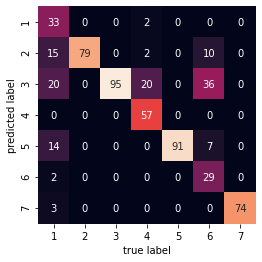

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_SVM_test, gnb_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df11.iloc[:,0].unique(), yticklabels=df11.iloc[:,0].unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

### Prediciting Allotted Elective

In [ ]:
testnb = [54.0,	55.0,	19.0,	14.0,	47.0,	48.0,	15.0,	55.0,	45.0,	43.0, 2]
testnb2 = [testnb]

In [ ]:
test_pred = gnb.predict(testnb2)
test_pred[0]

1

In [ ]:
naivebase=[0]*7
for i in range(1,8):
  if i == test_pred[0]:
    naivebase[i-1] = naivebase[i-1]+100
naivebase

[100, 0, 0, 0, 0, 0, 0]



---

<br />

## Rank 3 Calculation

In [ ]:
#Calculating the count of the all Electives
SVV_count = df2.loc[df['Preference Of Elective']== 'SVV' ]

CS_count = df2.loc[df['Preference Of Elective']== 'CS']

CC_count = df2.loc[df['Preference Of Elective']== 'CC']

AR_VR_count = df2.loc[df['Preference Of Elective']== 'AR_VR']

ML_count = df2.loc[df['Preference Of Elective']== 'ML']

NLP_count = df2.loc[df['Preference Of Elective']== 'NLP']

IOT_count = df2.loc[df['Preference Of Elective']== 'IOT']
SVV_count2 = SVV_count.loc[SVV_count['Marks In Alloted Elective'] >= 90]
CS_count2 = CS_count.loc[CS_count['Marks In Alloted Elective'] >= 90]
CC_count2 = CC_count.loc[CC_count['Marks In Alloted Elective'] >= 90]
AR_VR_count2 = AR_VR_count.loc[AR_VR_count['Marks In Alloted Elective'] >= 90]
ML_count2 = ML_count.loc[ML_count['Marks In Alloted Elective'] >= 90]
NLP_count2 = NLP_count.loc[NLP_count['Marks In Alloted Elective'] >= 90]
IOT_count2 = IOT_count.loc[IOT_count['Marks In Alloted Elective'] >= 90]

rank3= [AR_VR_count2['Student_ID'].count()/AR_VR_count['Student_ID'].count(),
         CC_count2['Student_ID'].count()/CC_count['Student_ID'].count(),
CS_count2['Student_ID'].count()/CS_count['Student_ID'].count(),
IOT_count2['Student_ID'].count()/IOT_count['Student_ID'].count(),
ML_count2['Student_ID'].count()/ML_count['Student_ID'].count(),
NLP_count2['Student_ID'].count()/NLP_count['Student_ID'].count(),
SVV_count2['Student_ID'].count()/SVV_count['Student_ID'].count()]

rank3  


[0.19679633867276888,
 0.17003367003367004,
 0.17357512953367876,
 0.16776315789473684,
 0.16173570019723865,
 0.20125786163522014,
 0.2046783625730994]



---

<br />


## Weighted Rank Calculation

In [ ]:
rank1f = [x * 0.7 for x in rank1]
rank1f

[49.2,
 46.24666666666666,
 47.79090909090908,
 44.6,
 46.310526315789474,
 49.665,
 49.576470588235296]

In [ ]:
rank2 = [x * 0.05 for x in naivebase]
rank2

[5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
rank3f = [x * 25 for x in rank3]
rank3f

[4.919908466819222,
 4.250841750841751,
 4.339378238341969,
 4.194078947368421,
 4.043392504930966,
 5.031446540880504,
 5.116959064327485]

In [ ]:
WR = [] 
for i in range(0, len(rank1f)): 
    WR.append(rank1f[i] + rank2[i]+ rank3f[i]) 
WR

[59.119908466819226,
 50.49750841750841,
 52.130287329251054,
 48.79407894736842,
 50.35391882072044,
 54.6964465408805,
 54.693429652562784]

In [ ]:
dict = {'Electives':['AR_VR', 'CC', 'CS', 'IOT','ML','NLP','SVV'],  
       } 
df9 = pd.DataFrame(WR)
df7 = pd.DataFrame(dict)
df8 = pd.concat([df7,df9],ignore_index=False,axis=1,verify_integrity=False)
df8


,Electives,0
0,AR_VR,59.119908
1,CC,50.497508
2,CS,52.130287
3,IOT,48.794079
4,ML,50.353919
5,NLP,54.696447
6,SVV,54.693430


## Final Order of Electives for Student

In [ ]:
df10=df8.sort_values(by=0, ascending=False)
df10

,Electives,0
0,AR_VR,59.119908
5,NLP,54.696447
6,SVV,54.693430
2,CS,52.130287
1,CC,50.497508
4,ML,50.353919
3,IOT,48.794079
